### Data Exploration

In this section, we describe the relevant columns of the dataset and their interpretation according to the business logic.

| **Column**              | **Description**                                                                                      | **Expected Range**                | **Justification**                                                                                   |
|-------------------------|------------------------------------------------------------------------------------------------------|-----------------------------------|-----------------------------------------------------------------------------------------------------|
| **ID**                  | A unique identifier for each customer or transaction.                                                | Unique identifier in **string** format | A unique identifier for each record.                                                                |
| **n_clicks**            | The number of clicks made by the user in the online store, indicating interest.                      | Positive values                   | Negative values are nonsensical and should be corrected. Expected range is 0 to 1000 clicks.        |
| **n_visitas**           | The number of visits to the online store by a customer.                                              | Positive values                   | Negative values are invalid. Common range is 0 to 300 visits depending on the customer.             |
| **monto_compras**       | The total amount spent by the customer in the store.                                                 | Positive values                   | Negative values are not valid. Exceptional values may exceed 5000 monetary units but are valid.     |
| **monto_descuentos**    | The total amount of discounts applied to the customer.                                               | Positive values                   | Discounts cannot be negative. They are typically based on a percentage of the total purchase.       |
| **dias_primera_compra** | The number of days since the customer's first purchase.                                             | Positive values                   | Negative values are not possible. Expected range is from 0 to 500 days.                            |
| **info_perfil**         | Classification of customers into profiles based on behavior or characteristics.                      | Integers between 100 and 350      | Negative values are illogical and should be corrected. This field categorizes customers by behavior. |

In [106]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
# Util functions
def hist(df, column):
    plt.figure(figsize=(6, 4))
    df[column].plot(kind="hist")
    plt.title("Distribution of "+column)
    plt.ylabel("Values")
    plt.show()

def box(df, column):
    plt.figure(figsize=(6, 4))
    df[column].plot(kind="box")
    plt.title("Distribution of "+column)
    plt.ylabel("Values")
    plt.show()
    
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def del_outliers_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# def del_outliers_df(df):
#     numerics = df.select_dtypes(include=[np.number])
#     Q1 = numerics.quantile(0.25)
#     Q3 = numerics.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     no_outliers = numerics[~((numerics < lower_bound) | (numerics > upper_bound)).any(axis=1)]
#     df_cleaned = pd.concat([no_outliers, df.select_dtypes(exclude=[np.number])], axis=1)
#     print(df.shape, no_outliers.shape, df_cleaned.shape)
#     return df_cleaned

In [108]:
# Loading dataset
dataset_path = "../data/raw/dataset_ecommerce.csv"
df = pd.read_csv(dataset_path)

In [109]:
# Viewing data
print(df.head())
print(df.describe())

         ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
0  GGNEPpxo     198.0       44.0         3393.0              67.0   
1  tRA5byjK     303.0       74.0         3026.3              90.4   
2  vWxSsT0V     267.0       60.0         3490.2              80.5   
3  sxVV8jGL     177.0       85.0         3525.1              92.7   
4  YBs4XIN5     224.0       73.0         2980.9              72.6   

   dias_primera_compra  info_perfil  
0                241.0        235.0  
1                193.0        246.0  
2                111.0        220.0  
3                142.0        200.0  
4                227.0        109.0  
           n_clicks     n_visitas  monto_compras  monto_descuentos  \
count  55049.000000  55048.000000   55050.000000      55052.000000   
mean     408.723083     94.028702    1748.510134        448.956200   
std      175.677082     34.891261    1164.969753        503.152846   
min      -21.000000    -20.000000    -123.100000        -27.700000   
25%    

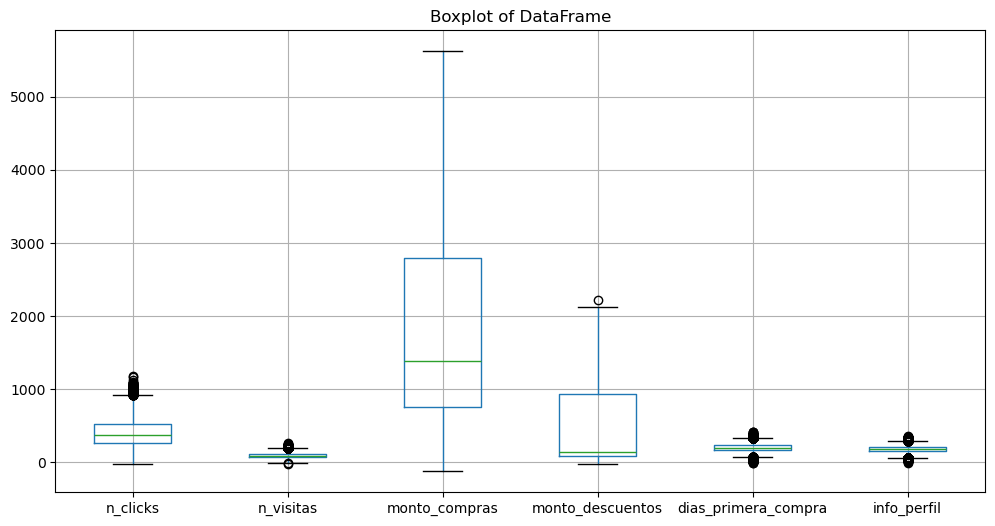

In [110]:
# Viewing the distributions of all columns
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplot of DataFrame")
plt.show()

In [111]:
numerical_df = df.drop(columns=["ID"])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                     n_clicks  n_visitas  monto_compras  monto_descuentos  \
n_clicks             1.000000   0.554308      -0.435220          0.697419   
n_visitas            0.554308   1.000000      -0.381722          0.639706   
monto_compras       -0.435220  -0.381722       1.000000         -0.258211   
monto_descuentos     0.697419   0.639706      -0.258211          1.000000   
dias_primera_compra  0.031789   0.030137      -0.016804          0.039495   
info_perfil         -0.115706  -0.105365       0.112933         -0.119133   

                     dias_primera_compra  info_perfil  
n_clicks                        0.031789    -0.115706  
n_visitas                       0.030137    -0.105365  
monto_compras                  -0.016804     0.112933  
monto_descuentos                0.039495    -0.119133  
dias_primera_compra             1.000000    -0.006447  
info_perfil                    -0.006447     1.000000  


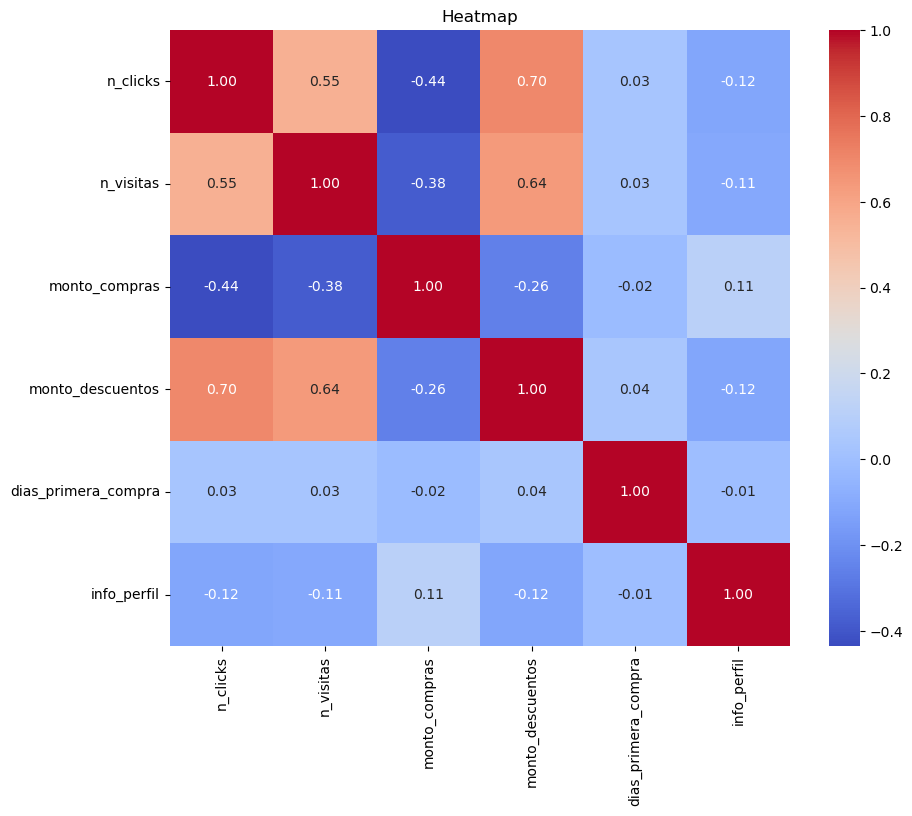

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap")
plt.show()

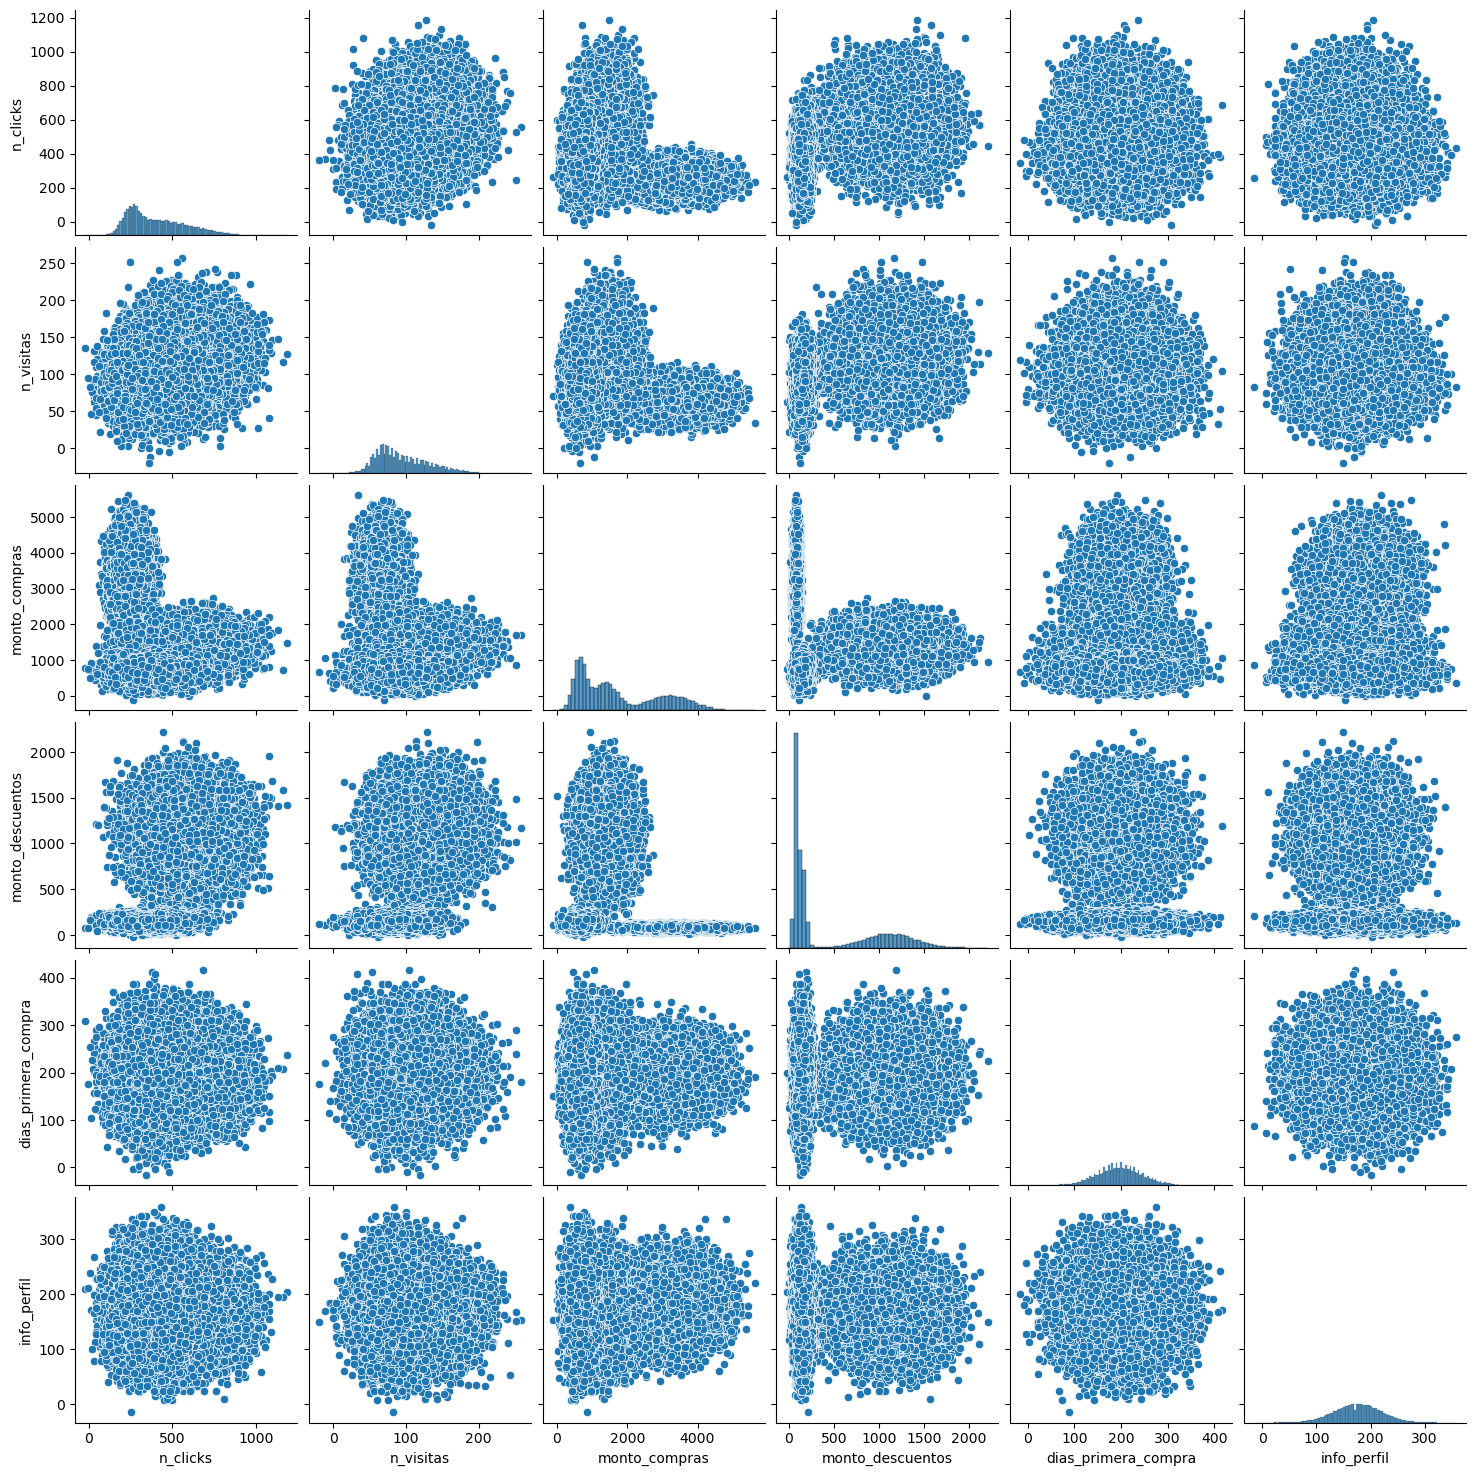

In [113]:
sns.pairplot(df)

#### Cleaning Null Data
In this section, we will begin by analyzing and handling NaN values.

In [114]:
# Viewing NaN values
print("Total NaN values per column:")
print(df.isna().sum())

Total NaN values per column:
ID                     0
n_clicks               7
n_visitas              8
monto_compras          6
monto_descuentos       4
dias_primera_compra    1
info_perfil            9
dtype: int64


In [115]:
# Looking for NaN values in dataframe
# print(df[df.isnull().any(axis=1)])

##### Looking for specific NaN values per column

In [116]:
# Looking NaN values in n_clicks column
# df_with_nulls = df[df["n_clicks"].isnull()]
# print(df_with_nulls)

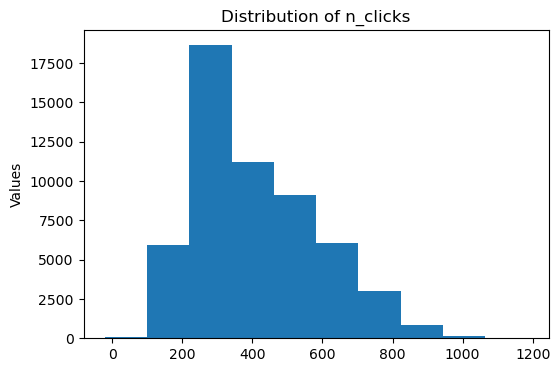

In [117]:
# Viewing distribution of n_clicks
hist(df, "n_clicks")

The NaN values in the `n_clicks` column represent errors according to the business logic. Since these clients are regular, the missing values can be reasonably replaced with the median of the column. Therefore, they will be replaced with the median.

In [118]:
# Replacing NaN n_clicks with the mean of n_clicks
df["n_clicks"] = df["n_clicks"].fillna(df["n_clicks"].median())

In [119]:
# Looking NaN values in n_visitas column
# df_with_nulls = df[df["n_visitas"].isnull()]
# print(df_with_nulls)

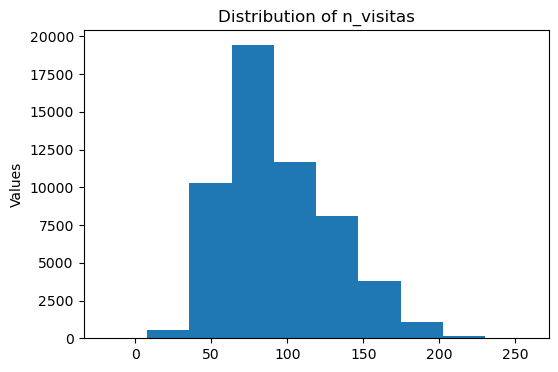

In [120]:
# Viewing distribution of n_visitas
hist(df, "n_visitas")

For the NaN values in the `n_visitas` column, we will treat them replacing the NaN values with the mean of the column. According to the business logic, these values represent the number of visits made by the client. Therefore, it is reasonable to replace these missing values with the column's mean, assuming that these clients are regular based on their data.

In [121]:
# Replacing NaN n_visitas with the mean of n_visitas
df["n_visitas"] = df["n_visitas"].fillna(df["n_visitas"].mean())

In [122]:
# Viewing NaN values
print("Total NaN values per column:")
print(df.isna().sum())

Total NaN values per column:
ID                     0
n_clicks               0
n_visitas              0
monto_compras          6
monto_descuentos       4
dias_primera_compra    1
info_perfil            9
dtype: int64


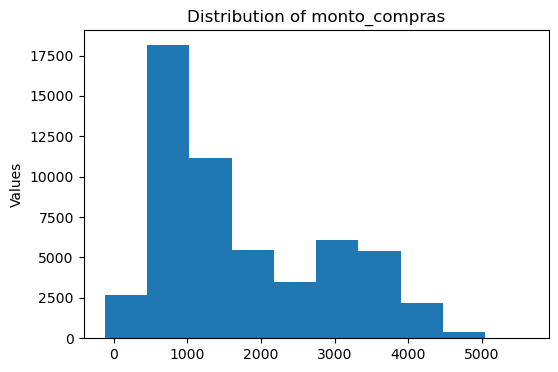

In [123]:
# Viewing distribution of monto_compras
hist(df, "monto_compras")

This distribution is asymmetric and shows a slight right skew. The mean would be influenced by the higher values, while the median, not being affected by extreme values, better represents the center of the distribution. Therefore, replacing the NaN values with the median preserves consistency and avoids distortions in the analysis.

In [124]:
# Replacing NaN monto_compras with the median of monto_compras
df["monto_compras"] = df["monto_compras"].fillna(df["monto_compras"].median())

In [125]:
# Verifying replaced values
# df_with_nulls = df[df.isnull().any(axis=1)]
# print(df_with_nulls)

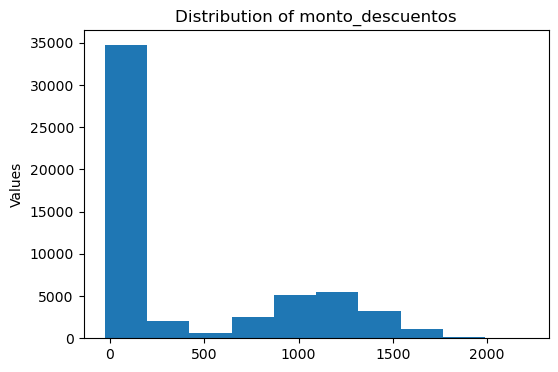

In [126]:
# Viewing distribution of monto_descuentos
hist(df, "monto_descuentos")

For the NaN values in `monto_descuentos`, we decided to treat them the same way as `monto_compras`, replacing the NaN values with the median of the column.

In [127]:
# Replacing NaN monto_descuentos with the median of monto_descuentos
df["monto_descuentos"] = df["monto_descuentos"].fillna(df["monto_descuentos"].median())

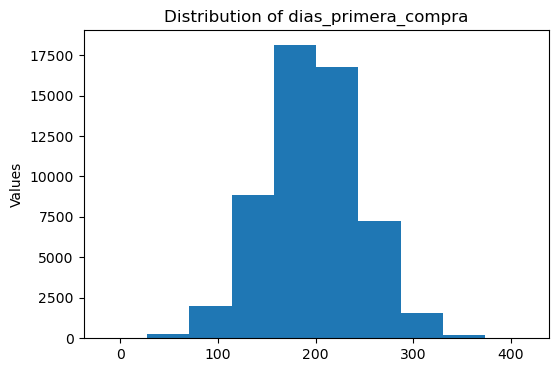

In [128]:
# Viewing distribution of dias_primera_compra
hist(df, "dias_primera_compra")

The distribution of `dias_primera_compra` is approximately normal. Therefore, the unique NaN values in this column will be replaced with the mean of `dias_primera_compra`.

In [129]:
df["dias_primera_compra"] = df["dias_primera_compra"].fillna(df["dias_primera_compra"].mean())

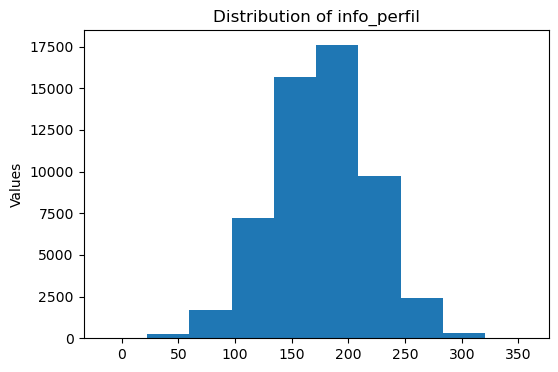

In [130]:
# Viewing distribution of info_perfil
hist(df, "info_perfil")

The distribution of `info_perfil` looks similar to that of `dias_primera_compra`. So, we will replace NaN values with the mean.

In [131]:
df["info_perfil"] = df["info_perfil"].fillna(df["info_perfil"].mean())

#### Cleaning Negative Data

In [132]:
# print((numerical_df < 0).sum())

In [133]:
# print(numerical_df[(numerical_df < 0).any(axis=1)])

The negative values in `n_clicks` are errors, so these values will be replaced by the median. In the same way and for the same reason, `n_visitas` and `monto_compras` will be treated the same way.

In [134]:
# Replacing negative values in n_clicks with the median
median = df["n_clicks"][df["n_clicks"] >= 0].median()
df["n_clicks"] = df["n_clicks"].apply(lambda x: median if x < 0 else x)

In [135]:
# Replacing negative values in n_visitas with the median
median = df["n_visitas"][df["n_visitas"] >= 0].median()
df["n_visitas"] = df["n_visitas"].apply(lambda x: median if x < 0 else x)

In [136]:
# Replacing negative values in n_visitas with the median
median = df["monto_compras"][df["monto_compras"] >= 0].median()
df["monto_compras"] = df["monto_compras"].apply(lambda x: median if x < 0 else x)

Negative values in `monto_descuentos` will be replaced with zero to simulate cases where there are no discounts applied, allowing us to observe the impact on the analysis.

In [137]:
# Replacing negative values in monto_descuentos with 0
df["monto_descuentos"] = df["monto_descuentos"].apply(lambda x: 0 if x < 0 else x)

Negative values in `dias_primera_compra` and `info_perfil` will be replaced with the mean due to their distribution, ensuring consistency in the dataset while preserving overall trends.

In [138]:
# Replacing negative values in dias_primera_compra with the mean
mean = df["dias_primera_compra"][df["dias_primera_compra"] >= 0].mean()
df["dias_primera_compra"] = df["dias_primera_compra"].apply(lambda x: mean if x < 0 else x)

In [139]:
# Replacing negative values in info_perfil with the mean
mean = df["info_perfil"][df["info_perfil"] >= 0].mean()
df["info_perfil"] = df["info_perfil"].apply(lambda x: mean if x < 0 else x)

#### Cleaning Outliers
Outliers, values that deviate from typical behavior, will be handled to avoid negative impacts on analysis and segmentation. Two separate `.csv` files will be created: one excluding outliers for more controlled analyses and another preserving them to maintain the integrity of the original data and allow comparisons when needed.

In [140]:
# const = 6
# cn = list(df.columns)
# box(df, cn[const])
# dfo = outliers(df, cn[const])
# print(dfo.tail(15))
# print(dfo.describe())

In [151]:
# Cleaning outliers
columns = df.columns.tolist()
clean_df = del_outliers_column(df, columns[1])
for _ in columns[2:]:
    clean_df = del_outliers_column(clean_df, _)

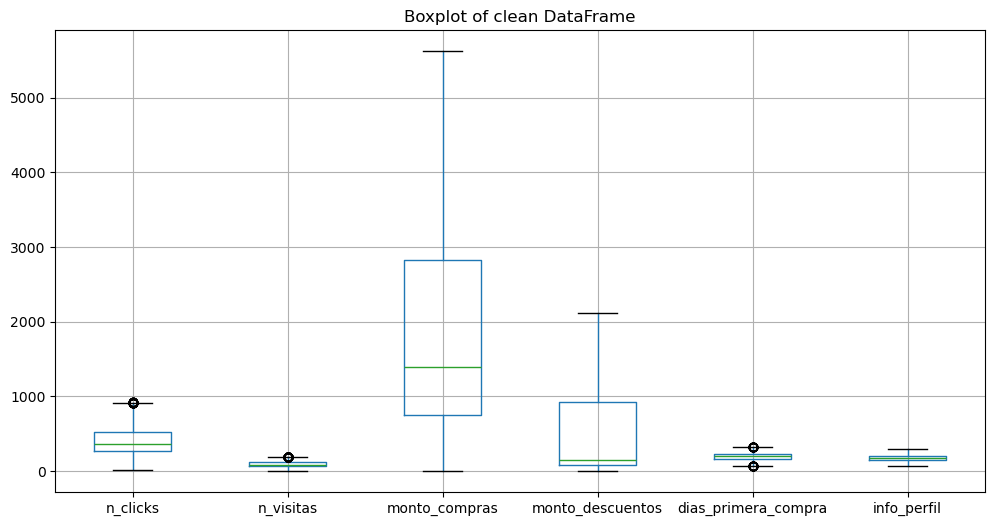

In [152]:
# Viewing the distributions of all columns cleaned
plt.figure(figsize=(12, 6))
clean_df.boxplot()
plt.title("Boxplot of clean DataFrame")
plt.show()

In [153]:
clean_df.describe()

,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
count,53361.000000,53361.000000,53361.000000,53361.000000,53361.000000,53361.000000
mean,404.713836,93.115875,1767.967339,441.995343,196.946828,176.538781
std,172.248182,33.879847,1172.474156,500.334078,46.221950,41.771592
min,10.000000,0.000000,4.700000,0.000000,69.000000,63.000000
25%,265.000000,67.000000,753.400000,86.800000,165.000000,148.000000
50%,365.000000,86.000000,1397.300000,143.000000,197.000000,177.000000
75%,524.000000,116.000000,2828.000000,918.900000,228.000000,205.000000
max,919.000000,192.000000,5621.600000,2123.300000,325.000000,290.000000


#### Saving DataFrames to .csv
This section focuses on saving the cleaned DataFrames into `.csv` files for further use. Two versions will be saved:  

1. **Cleaned Data Without Outliers**: For controlled analyses.
2. **Cleaned Data With Outliers**: To maintain data integrity and allow comparisons.  

In [158]:
# Saving dataframes
clean_df.to_csv("../data/processed/cleaned_dataset_no_outliers.csv", index=False)
df.to_csv("../data/processed/cleaned_dataset.csv", index=False)